In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import math
import csv
from sklearn.linear_model import LinearRegression

# 1- Análisis estadístico

In [3]:
# Cargar el conjunto de datos en un marco de datos
Notas = pd.read_csv("DataSetGrades/NotasFuturas.csv")

#Varios valores estadisticos
print(Notas.describe())

        proyecto1   proyecto2    examen 1     taller1        nota
count  102.000000  102.000000  102.000000  102.000000  102.000000
mean    64.125490   65.312745   42.665686   69.585294   66.008235
std     32.082628   29.468697   20.549224   29.608938   26.003992
min      0.000000    0.000000    0.000000    0.000000    0.750000
25%     40.500000   60.000000   29.200000   60.000000   60.435000
50%     70.800000   70.000000   41.650000   79.300000   74.430000
75%     94.750000   93.325000   56.850000  100.000000   81.752500
max    100.000000  100.000000   86.500000  100.000000   97.610000


In [6]:
# Calcular la matriz de correlación
corr = Notas.corr()

# Cuales son los resultados que se tiene de diabetes.
columnas = Notas["nota"].unique()

print(columnas)


[80.2   2.5  80.8  82.1  69.4  76.6  70.7  79.3  67.6  77.6  75.2  72.4
 78.6  25.9  67.9  50.2  68.2  82.9  76.3   2.   58.   68.3  73.1  69.6
 96.   64.97 79.64 11.69 10.8  96.1  70.44 91.5  54.59 91.8  69.24 76.9
 76.11 79.03 77.23  5.92 75.11 97.61 80.09 77.12 58.13 43.75 83.63 74.67
 81.16 73.35 81.03  1.25 78.57 78.19 92.61 72.41 93.99 79.1  47.13  4.09
 76.16 81.95 73.36 79.32 73.19  0.9  70.08 91.02 73.41 94.97 87.85 84.43
 67.94 10.86 66.38 59.96 74.19  0.75 61.86 38.39 39.24 87.62 87.61 10.44
 88.7  22.01 36.27 59.59 44.57 23.79 85.18 88.17 88.04 68.76 87.66 84.18
 87.47 86.24 87.31 69.37]


# 2- Visualización de los datos

<Axes: >

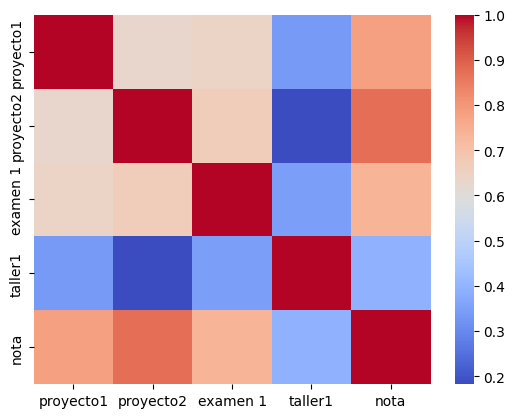

In [7]:
# Graficar la matriz de correlación utilizando un mapa de calor
sns.heatmap(corr, cmap='coolwarm')

In [10]:
# Crea la gráfica de cajas

# Muestra las gráficas de cajas para todos los features
#for feature in Notas.columns[:-1]:
#    sns.catplot(data=Notas, x='nota', y=feature, kind='box')

# 3- Normalización

In [14]:
# Imputar valores faltantes
imputer = SimpleImputer(strategy="median")
imputed_data = pd.DataFrame(imputer.fit_transform(Notas), columns=Notas.columns)

# Eliminar valores atípicos
q1 = Notas.quantile(0.25)
q3 = Notas.quantile(0.75)
iqr = q3 - q1
Notas = Notas[~((Notas < (q1 - 1.5 * iqr)) | (Notas > (q3 + 1.5 * iqr))).any(axis=1)]

# Normalizar las variables de entrada
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(imputed_data.iloc[:, :-1]), columns=imputed_data.columns[:-1])

# Agregar la variable de salida
normalized_data["nota"] = imputed_data["nota"]

# Guardar los datos normalizados en un nuevo archivo CSV
#normalized_data.to_csv("DataSetGrades/NotasFuturas-Normalizadas.csv", index=False)

print(normalized_data.head())

   proyecto1  proyecto2  examen 1  taller1  nota
0      1.000   1.000000  0.516739      0.8  80.2
1      1.000   0.000000  0.462882      1.0  80.8
2      1.000   1.000000  0.637555      1.0  82.1
3      0.425   0.272727  0.542940      1.0  69.4
4      0.453   0.272727  0.301310      1.0  76.6


# 5- Aplicar modelo con librerias

In [15]:

# Leer el archivo CSV y cargarlo en un dataframe
normalized_data = pd.read_csv("DataSetGrades/NotasFuturas-Normalizadas.csv")

# Creamos el modelo de regresión lineal con librerias
modelo = LinearRegression()

print(normalized_data.head())

# Extraemos las características y las etiquetas del conjunto de datos
x = normalized_data["proyecto2"]
y = normalized_data["nota"]

print(x)
print("\n")
print(y)
# Entrenamos el modelo utilizando los datos de entrada
modelo.fit(x, y)

# Predecimos valores utilizando el modelo
y_pred = modelo.predict(x)
# Imprimimos los coeficientes de la regresión
print('Intercepto:', modelo.intercept_)
print('Pendiente:', modelo.coef_[0])

# Graficamos los resultados
plt.scatter(y, y_pred)
plt.xlabel('Precios reales')
plt.ylabel('Precios predichos')
plt.title('Regresión lineal para precios de casas en Boston')
plt.show()

   proyecto1  proyecto2  examen 1  taller1  nota
0      1.000   1.000000  0.516739      0.8  80.2
1      1.000   0.000000  0.462882      1.0  80.8
2      1.000   1.000000  0.637555      1.0  82.1
3      0.425   0.272727  0.542940      1.0  69.4
4      0.453   0.272727  0.301310      1.0  76.6
0     1.000000
1     0.000000
2     1.000000
3     0.272727
4     0.272727
        ...   
83    0.454545
84    0.787273
85    1.000000
86    1.000000
87    1.000000
Name: proyecto2, Length: 88, dtype: float64


0     80.20
1     80.80
2     82.10
3     69.40
4     76.60
      ...  
83    84.18
84    87.47
85    86.24
86    87.31
87    69.37
Name: nota, Length: 88, dtype: float64


ValueError: Expected 2D array, got 1D array instead:
array=[1.         0.         1.         0.27272727 0.27272727 0.27272727
 1.         0.30909091 1.         0.27272727 0.27272727 0.27272727
 0.27272727 0.27272727 0.         0.27272727 0.27272727 0.16363636
 0.30909091 0.30909091 0.27272727 0.27272727 1.         0.27272727
 1.         1.         0.27272727 1.         0.27272727 1.
 0.27272727 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 1.         0.54545455 0.45454545 0.         0.         0.90909091
 0.36363636 0.45454545 0.90909091 0.94545455 0.45454545 0.33272727
 0.45454545 0.94545455 0.45454545 0.94545455 0.90909091 0.
 0.45454545 0.45454545 0.36363636 0.45454545 0.33272727 0.90909091
 0.94545455 0.33272727 1.         1.         0.45454545 0.48545455
 0.18181818 0.18181818 0.45454545 0.18181818 1.         0.05454545
 0.78727273 0.78727273 1.         0.05454545 0.48545455 0.05454545
 0.45454545 1.         0.48545455 0.48545455 0.78727273 0.45454545
 0.78727273 1.         1.         1.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.